Anime and manga are <i>retail products</i>. The purpose of this projoect is to identify what types of words resonate with audiences. This will provide insight into why this series was chosen for an anime adaptation and marketing. 
The second part of this project is to determine if lines from an anime series can serve as training data for text classification.

This project is based on an anime called BLUELOCK. Here's the description of the series from Crunchyroll, since I like the site's copy so much: 

"Japan’s desire for World Cup glory leads the Japanese Football Association to launch a new rigorous training program to find the national team’s next striker. Three hundred high school players are pitted against each other for the position, but only one will come out on top. Who among them will be the striker to usher in a new era of Japanese soccer?"

The first part of this project contains the text transcript from the English dub for Team Z's match vs. Team Y. This match lasts from episodes 4 to the first part of episode 5. 

The second part has lines from the series labeled as "ego" (aka positive in the context of the series) or "neg" for negative (aka negative sentiment also in the context of the series. Lines were manually selected by this analyst. 

<b>Enjoy!</b>

In [1]:
# Import initial packages

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Dataframe set up

path = "C:/Umbra LLC/YouTube Channel/Github Project/Blue Lock_vs Team Y - ep 4 to 5/bluelock.xlsx"
df = pd.read_excel(path)
df = df.applymap(str)
df.head()

,Text
0,"As far as mottos go, mine would be sexy soccer..."
1,Can't we come up with a strategy one where we ...
2,That's it.
3,This might work. I've got a way we'll all get ...
4,Maybe I don't have one. And I shouldn't be a s...


In [3]:
# Structure of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    44 non-null     object
dtypes: object(1)
memory usage: 480.0+ bytes


<b>Time to Tokenize!</b>

Tokenization in Python is the process of splitting a larger body of text into smaller units, such as words or sentences. There are different methods and libraries to perform tokenization in Python, such as split(), nltk, keras, gensim and regex

In [4]:
# Tokenize text

import regex as re


def tokenize(text):
    return re.findall(r"[\w-]*\p{L}[w-]*", text)

test = "As far as mottos go, mine would be sexy soccer."

tokens = tokenize(test)
print("|".join(tokens))


As|far|as|mottos|go|mine|would|be|sexy|soccer


In [5]:
# Import nltk package

import nltk

stopwords = set(nltk.corpus.stopwords.words("english"))

In [6]:
def remove_stop(tokens): 
    return[t for t in tokens if t.lower() not in stopwords]

In [7]:
include_stopwords = {"let", "right", "get", "one", "yeah", "got", "take", "like", "next"}
exclude_stopwords = {"I", "my", "mine"}

stopwords |= include_stopwords
stopwords -= exclude_stopwords

In [8]:
# Set up pipeline 

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens


In [9]:
df["tokens"] = df["Text"].apply(prepare, pipeline = pipeline)

In [10]:
# Add another column to contain the length of the token list

df["num_tokens"] = df["tokens"].map(len)

In [11]:
# Set up counter 

from collections import Counter

counter = Counter()

df["tokens"].map(counter.update)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
Name: tokens, dtype: object

In [12]:
# Count the most common words

print(counter.most_common(10))

[('my', 25), ('us', 20), ('time', 19), ('ball', 17), ('weapon', 14), ('weapons', 13), ('okawa', 12), ('pass', 11), ('goal', 11), ('isagi', 10)]


This episode, more than others, focuses on both the individual soccer player and the soccer team. Therefore, it makes sense "my" and "us" rank high in frequency. We can see this in "weapon" (14) and "weapons" (13) as well. 

In [13]:
def count_words(df, column = "tokens", preprocess = None, min_freq = 2):
    #process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    return freq_df.sort_values("freq", ascending = False)

# create counter and run through all data
counter = Counter()
df["tokens"].map(counter.update)

# transform counter into a DataFrame
freq_df = pd.DataFrame.from_dict(counter, orient = "index", columns = ["freq"])
freq_df = freq_df.query("freq >= 2")
freq_df.index.name = "token"



In [14]:
# Top 20 word frequencies

freq_df = count_words(df)
freq_df.head(20)

,freq
token,
my,25
us,20
time,19
ball,17
weapon,14
weapons,13
okawa,12
pass,11
goal,11


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

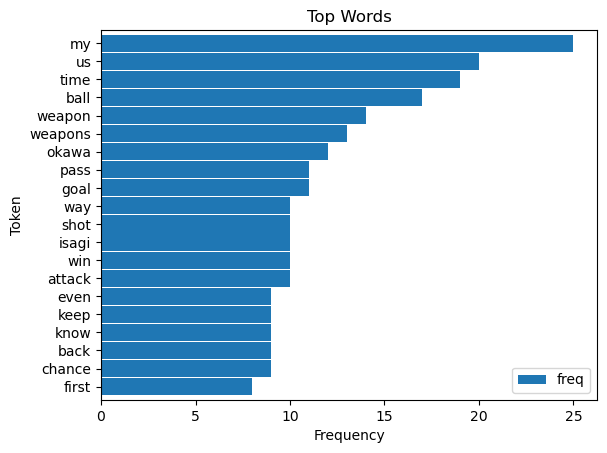

In [15]:
# Top 20 word frequencies as a bar chart 

ax = freq_df.head(20).plot(kind = "barh", width = 0.95)
ax.invert_yaxis()
ax.set(xlabel = "Frequency", ylabel = "Token", title = "Top Words")

(-0.5, 399.5, 199.5, -0.5)

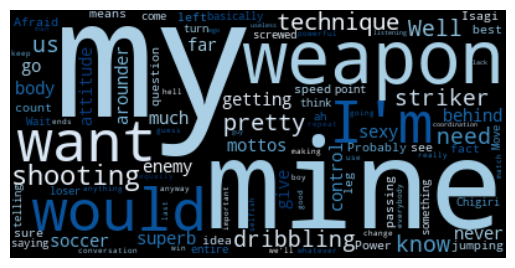

In [16]:
# Wordcloud - Plain and unfiltered with appropriate blue color
# For reference the colormap = "Blues" is from matploblib colormap. You can find here:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

from wordcloud import WordCloud
from matplotlib import pyplot as plt

text = df["Text"].values[0]

wc = WordCloud(max_words = 100, stopwords = stopwords, colormap = "Blues")
wc.generate(text)
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

In [17]:
# !pip install textblob
# !pip install -U textblob
# !python -m textblob.download_corpora

import nltk
nltk.download("punkt")
from textblob import TextBlob

ego = TextBlob("He's there? How? Score it, you egoist. Yoichi Isagi. I am a striker.")

ego.tags

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rakim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('He', 'PRP'),
 ("'s", 'VBZ'),
 ('there', 'RB'),
 ('How', 'WRB'),
 ('Score', 'NN'),
 ('it', 'PRP'),
 ('you', 'PRP'),
 ('egoist', 'VBP'),
 ('Yoichi', 'NNP'),
 ('Isagi', 'NNP'),
 ('I', 'PRP'),
 ('am', 'VBP'),
 ('a', 'DT'),
 ('striker', 'NN')]

In [18]:
# Test out noun phrases from sentence "He's there? How? Score it, you egoist. Yoichi Isagi. I am a striker."

ego.noun_phrases

WordList(['score', 'yoichi isagi'])

In [19]:
# Sentiment of sentence. 

ego.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [20]:
train = [
    ("You and I have the same kind of eyes but it won't save you in the end.", "ego"),
    ("I'm the one calling the shots, not you.", "ego"),
    ("My eyes can accurately read the situation on the field and my brain excels at coordinating people.", "ego"),
    ("My weapon is my never say die attitude.", "ego"),
    ("I won't let this happen.", "ego"),
    ("At the last moment you chose to give up the ball, which means you're no striker at all.", "ego"),
    ("I want to win.", "ego"),
    ("Now is the time to be reborn.", "ego"),
    ("Score it you egoist.", "ego"),
    ("I am a striker!", "ego"),
    ("An awakening is the moment you open your eyes and realize who you really are.", "ego"),
    ("I crushed their dreams.", "ego"),
    ("I don’t know what this feeling is, but I like it.", "ego"),
    ("But I'm not going to wait for you, Isagi.", "ego"),
    ("I devoured you, Rin.", "ego"),
    ("Do me a favor genius and shut it.", "ego"),
    ("The best striker in the world will be the one who dominates the field in this blue frenzy.", "ego"),
    ("Valuing your ties to others?", "neg"),
    ("Are you my official stalker or what?", "neg"),
    ("This is why this country's soccer remained weak.", "neg"),
    ("I'm gonna discourage you.", "neg"),
    ("What the hell are you even playing soccer for?", "neg"),
    ("If you can't live only for that glorious moment then you're no striker at all.", "neg"),
    ("You're not diamonds, you're froggies in a cage.", "neg"),
    ("This is the bad, the score is two zip.", "neg"),
    ("Stop screwing over the rest of us.", "neg"),
    ("They trapped us in a hopeless situation.", "neg"),
    ("Hurry up or they will steal the ball.", "neg"),
    ("This formula won't allow me to score a goal", "neg"),
    ("Is it like going from ordinary to extraordinary like a Super Saiyan?", "neg"),
    ("I'm waiting, pass.", "ego"),
    ("Anyone who loses here will never be able to play for Japan.", "neg")
 
    
 
]

test = [
    ("When I play, the ball isn’t my friend or any nonsense like that.", "ego"),
    ("Whenever I'm out on the field, I'm the King.", "ego"),
    ("One final time, I will dream!", "ego"),
    ("You're all half-baked NPC's to me.", "neg"),
    ("Nothing should bring you more joy than your own goals.", "ego"),
    ("We're our own biggest obstacles.", "neg"),
    ("Don't call me missy moron.", "ego"),
    ("Talent is the skill to prove one's own ability.", "ego"),
    ("You'll all seriously ill it seems.", "ego"),
    ("whoever scores the most is the best, end of story", "ego"),
    ("If you want a fun game with your pals, then lock off.", "neg"),
    ("Japan's team isn't weak?", "neg"),
    ("I don't care about my team, I just want to stand out.", "ego")
    
]

In [21]:
# Import TextBlob Classifier and set up 

from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train)

In [22]:
# Enter and classify a sentence.

cl.classify("It’s my turn! This is the moment of Yoichi Isagi’s awakening!")

'ego'

Yes..."It’s my turn! This is the moment of Yoichi Isagi’s awakening!" is <b>very</b> egotistic.

How does the classifier determine if a sentence is <b>ego</b> or <b>neg</b>? 

In [23]:
# Label probability distribution

prob_dist = cl.prob_classify("It’s my turn! This is the moment of Yoichi Isagi’s awakening!")
prob_dist.max()

# Probability of ego label for sentence 

round(prob_dist.prob("ego"), 2)




0.92

In [24]:
# Probability of neg label for sentence

round(prob_dist.prob("neg"), 2)

0.08

In [25]:
# Feature importances - Note "I" 's importance to denoting something as ego (positive in the world of Bluelock)

cl.show_informative_features(5)

Most Informative Features
             contains(I) = True              ego : neg    =      5.5 : 1.0
           contains(for) = True              neg : ego    =      3.0 : 1.0
            contains(it) = True              ego : neg    =      2.4 : 1.0
             contains(a) = True              neg : ego    =      2.3 : 1.0
          contains(will) = True              neg : ego    =      2.1 : 1.0


Now let's see how this TextBlob classifier performs on accruacy.

In [26]:
# TextBlob Classifier Accuracy 

cl.accuracy(test)

0.9230769230769231

92.30% accuracy for this classifier is solid...and viable. 